# Graf cięciwowy
Graf nieskierowany, prostry $G$ nazywamy ${\bf grafem}$ ${\bf cięciwowym}$ wtedy i tylko wtedy gdy $G$ nie zawiera indukowanego cyklu długości większej niż 3

Zdefiniujemy teraz funkcję do rysowania grafów oraz późniejszego ich kolorowania i podamy dwa przykałady i antyprzykłady grafów cięciwowych

In [176]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [177]:
def visualize_coloring(graph, coloring=None, title="Graph Coloring"):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, seed=42)

    if coloring:
        num_colors = max(coloring.values()) + 1
        color_map = plt.cm.get_cmap('tab10', num_colors)
        node_colors = [color_map(coloring[node]) for node in G.nodes()]
    else:
        node_colors = 'lightblue'

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        node_size=500,
        edge_color='gray'
    )
    plt.title(title)
    plt.show()

def coloring(coloring_order, graph):
    colors = {}
    for node in coloring_order:
            neighbor_colors = {colors[neighbor] for neighbor in graph[node] if neighbor in colors}
            color = 0
            while color in neighbor_colors:
                color += 1
            colors[node] = color
            num_colors = max(colors.values()) + 1
    return colors, num_colors

In [178]:
antyprzyklad1 = {
    '1': {'2', '3'},
    '2': {'1', '4'},
    '3': {'1', '5'},
    '4': {'2', '5'},
    '5': {'3', '4'}
}

przyklad1 = {
    '1': {'2', '3', '4'},
    '2': {'1', '4'},
    '3': {'1', '5', '4'},
    '4': {'2', '5', '1', '3'},
    '5': {'3', '4'}
}

antyprzyklad2 = {
    '1': {'2', '3'},
    '2': {'1', '4'},
    '3': {'1', '4'},
    '4': {'2', '3'}    
}

przyklad2 = {
    '1': {'2', '3'},
    '2': {'1', '4', '3'},
    '3': {'1', '4', '2'},
    '4': {'2', '3'}    
}

Nasze anty przykłady będą grafami, które składają się z jednego cyklu, przykład pierwszy jest cyklem o długości 5, a przykład 2 ma długość 4. Aby przerobić je na grafy cięciwowe dodamy do nich "cięciwy" czyli krawędzie łączące dwa wierzchołki tak, aby powstały cyle o długości co najwyżej 3.

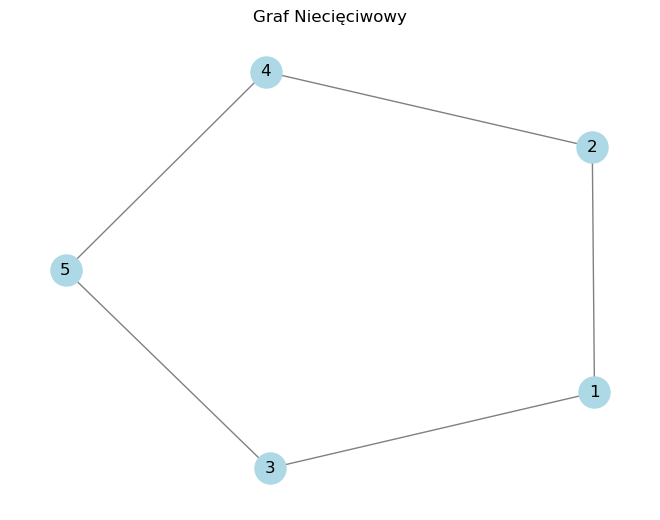

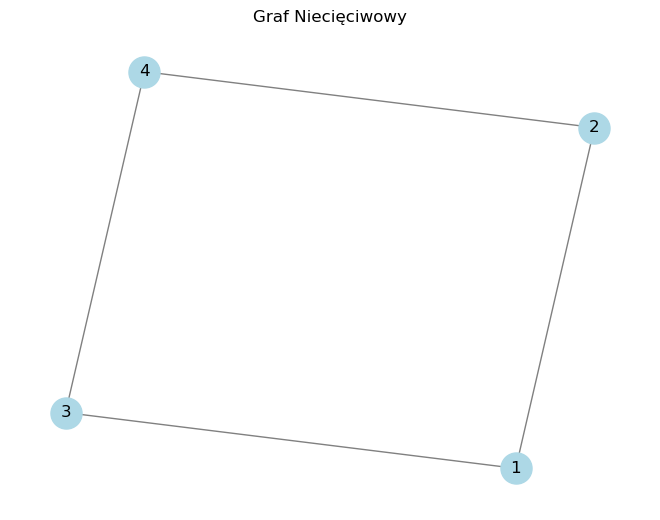

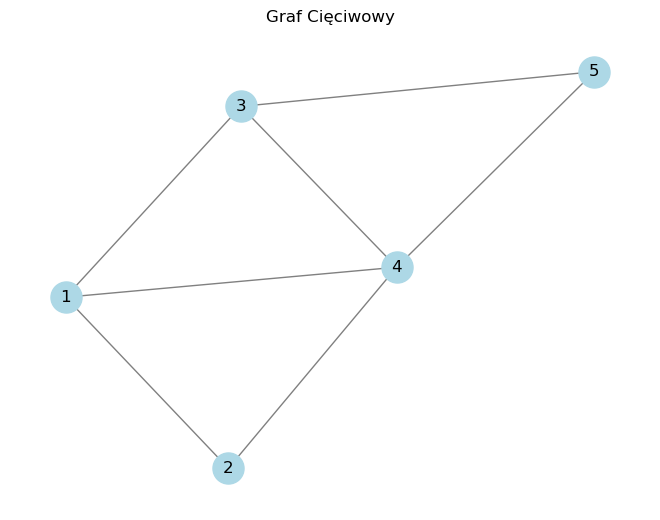

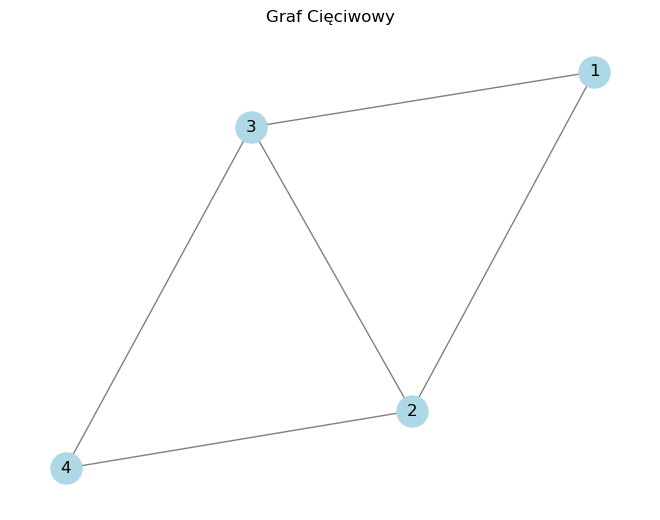

In [179]:
visualize_coloring(antyprzyklad1, title="Graf Niecięciwowy")
visualize_coloring(antyprzyklad2, title="Graf Niecięciwowy")
visualize_coloring(przyklad1, title="Graf Cięciwowy")
visualize_coloring(przyklad2, title="Graf Cięciwowy")

Do kolorowania grafów cięciwych wykorzystamy algorytm LexBFS, czyli leksografizne przechodzenie grafu wszerz.

In [180]:
def lex_bfs(graph):
    # graph: słownik {wierzchołek: zbiór sąsiadów}
    n = len(graph)
    ordering = []
    partition = [set(graph.keys())]

    for i in range(n):
        # Wybieramy pierwszy niepusty zbiór i wierzchołek z niego
        for S in partition:
            if S:
                v = S.pop()
                break
        ordering.append(v)

        # Nowa partycja
        new_partition = []
        for subset in partition:
            A = set()
            B = set()
            for u in subset:
                if u in graph[v]:
                    A.add(u)
                else:
                    B.add(u)
            if A:
                new_partition.append(A)
            if B:
                new_partition.append(B)
        partition = new_partition

    return ordering


Powyższy algorytm działa w następujący sposób:
1. Tworzy listę zbiorów partition, na początku jest to zbiór wszystkich wierzchołków grafu
2. Wybiera element z pierwszego zbioru z partition, usuwa go stamtąd i dodaje go do listy ordering
3. Dzieli pozostałe wierzchołki na sąsiadów i nie sąsiadów wyrzuconego wierzchołka (i robi to oddzielnie dla każdego podzbioru w partycji), a następnie zastępuje tymi zbiorami listę patrition
4. Powtarza się do póki partition nie będzie puste

Ciąg wyzanczony przez algorytm LexBFS jest porządkiem kolorowania grafu cięciwowego, natomiast ten ciąg odwrócony wyznacza doskonały porządek usuwania. Z twierdzenia z wykłądu wiemy więc, że ten porządek kolorowania jest też porządkiem doskonałym

# Kolorwanie grafów cięciwowych

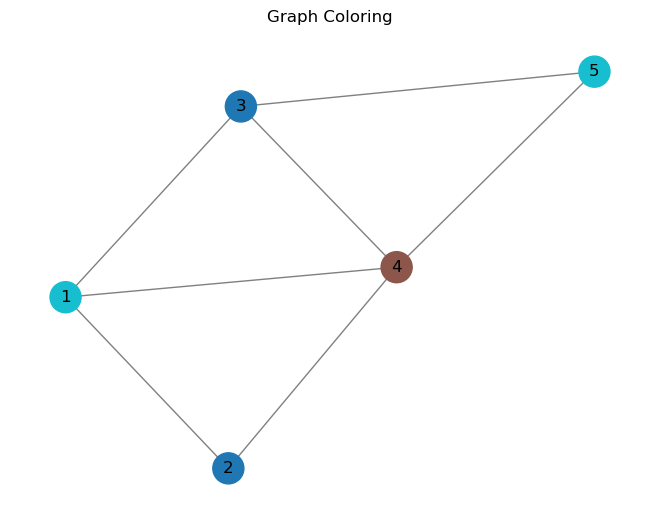

['2', '4', '1', '3', '5']

In [181]:
colors, num_colors = coloring(lex_bfs(przyklad1), przyklad1)
visualize_coloring(przyklad1, colors)
lex_bfs(przyklad1)

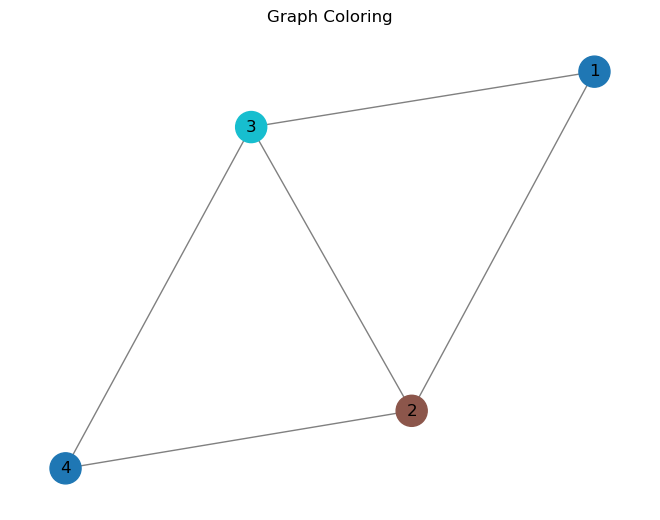

['4', '2', '3', '1']

In [182]:
colors, num_colors = coloring(lex_bfs(przyklad2), przyklad2)
visualize_coloring(przyklad2, colors)
lex_bfs(przyklad2)

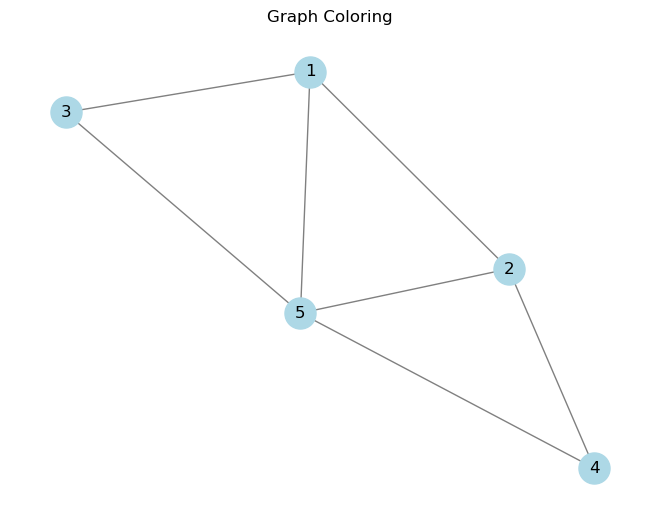

In [183]:
przyklad3 = {
    '1': {'2', '3', '5'},
    '2': {'1', '4', '5'},
    '3': {'1', '5'},
    '4': {'2', '5'},
    '5': {'3', '4', '2', '1'}
}
visualize_coloring(przyklad3)

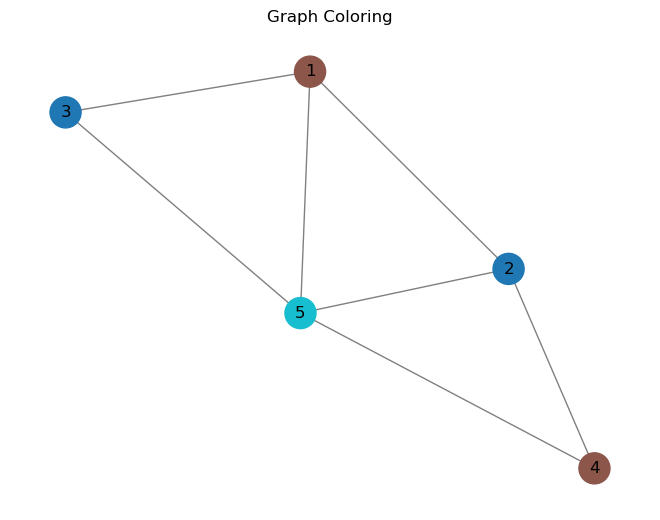

['2', '4', '5', '1', '3']

In [184]:
colors, num_colors = coloring(lex_bfs(przyklad3), przyklad3)
visualize_coloring(przyklad3, colors)
lex_bfs(przyklad3)

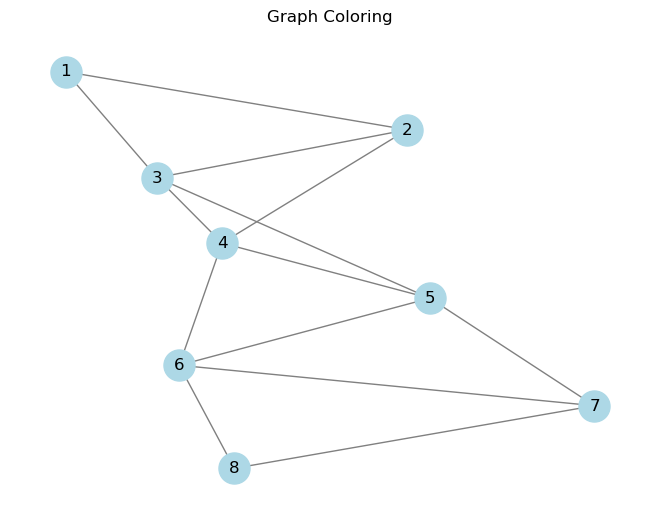

In [185]:
przyklad4 = {
    '1': {'2', '3'},
    '2': {'1', '3', '4'},
    '3': {'1', '2', '4', '5'},
    '4': {'2', '3', '5', '6'},
    '5': {'3', '4', '6', '7'},
    '6': {'4', '5', '7', '8'},
    '7': {'5', '6', '8'},
    '8': {'7', '6'}
}
visualize_coloring(przyklad4)

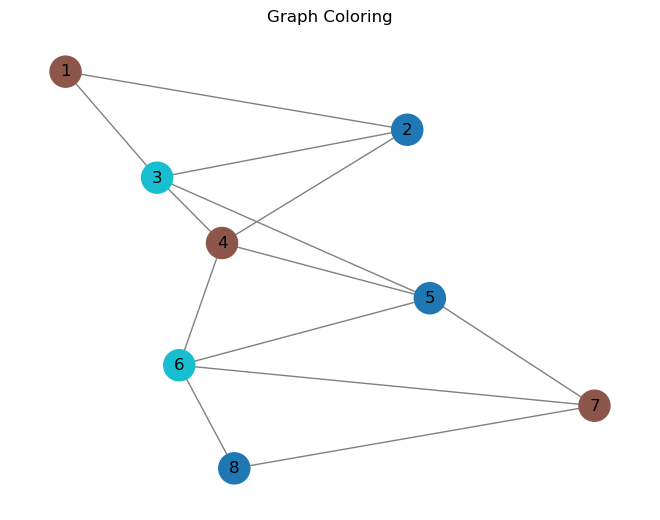

['2', '4', '3', '1', '5', '6', '7', '8']

In [186]:
colors, num_colors = coloring(lex_bfs(przyklad4), przyklad4)
visualize_coloring(przyklad4, colors)
lex_bfs(przyklad4)